Chloe Quinto    
CPE 695/WS  
HW2   
February 12, 2020   
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto 


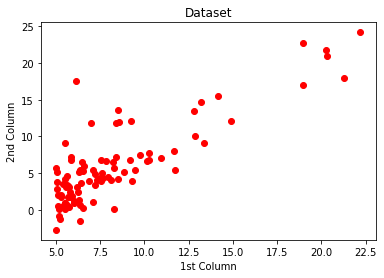

In [1]:
"""
In this problem, we write a program to find the coefficients for a linear regression model for the dataset
provided by (data2.txt). Assume a linear model: y = w0 + w1* x
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("data2.txt", header = None)

x = np.array(data[0])
y = np.array(data[1])

plt.scatter(x,y,color='red')
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()


---

We need to find the normal equation given: 

<img src="images/normalEquation.png">


In [2]:
#add an additional column of 1s in our x column and we call this additional matrix as x_bias.
x_bias = np.ones((97,1))
x = np.reshape(x,(97,1))
x = np.append(x_bias,x,axis=1)

Let's try to find our transpose, dotproduct, and inverse

<img src="images/firstHalf.png">

In [3]:
x_transpose = np.transpose(x) #x^T
x_transpose_dot_x = x_transpose.dot(x) #x^T*x
firstHalf = np.linalg.inv(x_transpose_dot_x)# (x^T*x)^-1

In [4]:
firstHalf

array([[ 0.05662112, -0.00567561],
       [-0.00567561,  0.00069556]])

Now we have to take find the transpose and dot product of the second half of the equation

<img src = "images/secondHalf.png">

In [5]:
secondHalf = x_transpose.dot(y) #x^T*y 

In [6]:
secondHalf

array([ 566.3961    , 6336.89842532])

In [7]:
theta = firstHalf.dot(secondHalf)

In [8]:
thetaOne = theta[0]
thetaTwo = theta[1]

print("y=" + str(thetaOne) + " + "+ str(thetaTwo) + "*x")
y = thetaOne + thetaTwo*x

y=-3.8957808783119106 + 1.1930336441895983*x


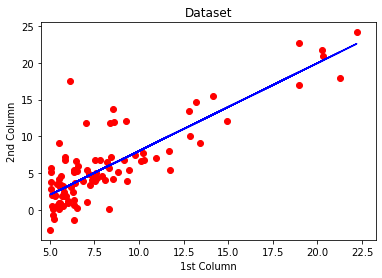

In [9]:
x_original = np.array(data[0])
y_original = np.array(data[1])


plt.scatter(x_original, y_original, color="red")
plt.plot(x,y,color='blue') 
plt.xlim(4.5)
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()

In [10]:
"""
The above to compute normal equation can be simplied with the following: 
"""

x = np.array(data[0])
y = np.array(data[1])

m = 97 
x = np.reshape(x,(m,1))
y = np.reshape(y,(m,1))

x_bias = np.c_[np.ones((m, 1)), x] 

theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)

print("Normal Equation: (" + str(int(theta_best[0])) + "," + str(int(theta_best[1])) + ")")

Normal Equation: (-3,1)


---

Gradient Descent using batch AND stochastic modes respectively: 
 - Determine an appropriate termination condition(e.g. when cost function
    is less than a threshold, and/or after a given number of iterations)
 - Print the cost function vs iterations for each mode; compare and disuss batch and stochastic modes in terms of accuracy and the speed of convergence 
 - Choose the best learning rate. For example, you can plot cost function bs. learning rate to determine the best learning ratee 

## We need to determine an appropriate termination condition (e.g. when cost function is less than a threshold, and/or after a given number of iterations) 

Let's set the number of iterations to 1000 and the m = 97 from the given data 

## Now we want to print the cost function vs iterations for each mode

In [11]:


learning_rate = .01
number_of_iterations = 100

theta = np.random.randn(2,1) 
for iteration in range(number_of_iterations):
    gradients = 2/m * x_bias.T.dot(x_bias.dot(theta) - y)
    theta = theta - learning_rate * gradients
    print("Iteration #: " + str(iteration) + "     y = " + str(theta[0]) + " + " + str(theta[1]) + "*x ")

print("\n\nNormal Equation: (" + str((theta_best[0])) + "," + str((theta_best[1])) + ")")
print("Batch Gradient Descent: (" + str((theta[0])) + ", " +  str((theta[1])) + ")")

Iteration #: 0     y = [-0.45600917] + [1.60624067]*x 
Iteration #: 1     y = [-0.59223834] + [0.37215007]*x 
Iteration #: 2     y = [-0.52434427] + [1.16948833]*x 
Iteration #: 3     y = [-0.58793051] + [0.65761699]*x 
Iteration #: 4     y = [-0.56670966] + [0.98948958]*x 
Iteration #: 5     y = [-0.6000735] + [0.77758426]*x 
Iteration #: 6     y = [-0.59818797] + [0.91612236]*x 
Iteration #: 7     y = [-0.61894902] + [0.8288018]*x 
Iteration #: 8     y = [-0.62504447] + [0.88703411]*x 
Iteration #: 9     y = [-0.6405213] + [0.85145438]*x 
Iteration #: 10     y = [-0.64988212] + [0.87632702]*x 
Iteration #: 11     y = [-0.66311484] + [0.86223269]*x 
Iteration #: 12     y = [-0.67378277] + [0.87324456]*x 
Iteration #: 13     y = [-0.68603444] + [0.8680692]*x 
Iteration #: 14     y = [-0.69719647] + [0.87331916]*x 
Iteration #: 15     y = [-0.70899203] + [0.87184337]*x 
Iteration #: 16     y = [-0.72031084] + [0.87469527]*x 
Iteration #: 17     y = [-0.73186869] + [0.87475124]*x 
Iterat

This is close to what we found with the normal equation! 

## Choose the best learning rate. For example, you can plot cost function vs. learning rate to determine the best learning rate 

In [12]:
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5,1,2,5]
theta_values = []
theta = np.random.randn(2,1) # random initialization

for i in range(len(learning_rate)): 
    for iteration in range(number_of_iterations):
        gradients = 2/m * x_bias.T.dot(x_bias.dot(theta) - y)
        theta = theta - learning_rate * gradients
    a = (theta[0][i])
    b = (theta[1][i])
    theta_values.append([a,b])
    print("Learning Rate: " + str(learning_rate[i]) + " cost: " + str([a,b]))

Learning Rate: 0.01 cost: [-1.091696717005901, 0.9113329747944926]
Learning Rate: 0.02 cost: [-1.1548883600157917e+71, -1.1495905087306858e+72]
Learning Rate: 0.05 cost: [-5.486178505215494e+256, -5.461011606967615e+257]
Learning Rate: 0.1 cost: [nan, nan]
Learning Rate: 0.2 cost: [nan, nan]
Learning Rate: 0.5 cost: [nan, nan]
Learning Rate: 1 cost: [nan, nan]
Learning Rate: 2 cost: [nan, nan]
Learning Rate: 5 cost: [nan, nan]


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


In [13]:
y_val = []
for i,j in zip(theta_values, learning_rate):
    x = j 
    a = i[0]
    b = i[1]
    y = a + b*x
    y_val.append(y)
#     print(i)

y_val = np.array(y_val)

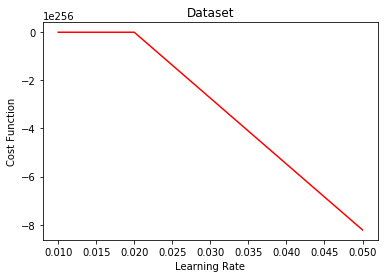

In [14]:
plt.plot(learning_rate, y_val, color="red")
plt.title("Dataset")
plt.xlabel("Learning Rate")
plt.ylabel("Cost Function")
plt.show()